In [ ]:
#Boston Housing Price Analysis Project
# author: Patrick

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:

# load the datasets

data1 = pd.read_csv("BostonHousing.csv")
data2 = pd.read_csv("housing.csv")
data3 = pd.read_csv("merged_data_final.csv")


In [ ]:
# just checking the head of each dataset

print("=== Data1 (BostonHousing) ===")
print(data1.head())
print(data1.info())



=== Data1 (BostonHousing) ===
      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   n

In [13]:
print("\n=== Data2 (housing.csv) ===")
print(data2.head())
print(data2.info())



=== Data2 (housing.csv) ===
      RM  LSTAT  PTRATIO      MEDV
0  6.575   4.98     15.3  504000.0
1  6.421   9.14     17.8  453600.0
2  7.185   4.03     17.8  728700.0
3  6.998   2.94     18.7  701400.0
4  7.147   5.33     18.7  760200.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   RM       489 non-null    float64
 1   LSTAT    489 non-null    float64
 2   PTRATIO  489 non-null    float64
 3   MEDV     489 non-null    float64
dtypes: float64(4)
memory usage: 15.4 KB
None


In [14]:
print("\n=== Data3 (merged_data_final) ===")
print(data3.head())
print(data3.info())


=== Data3 (merged_data_final) ===
       town  year     value          cat    county
0  Abington  2021  500000.0  house_price  Plymouth
1  Abington  2020  432750.0  house_price  Plymouth
2  Abington  2019  385000.0  house_price  Plymouth
3  Abington  2018  395000.0  house_price  Plymouth
4  Abington  2016  345000.0  house_price  Plymouth
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36252 entries, 0 to 36251
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   town    36252 non-null  object 
 1   year    36252 non-null  int64  
 2   value   36232 non-null  float64
 3   cat     36252 non-null  object 
 4   county  35005 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 1.4+ MB
None


In [17]:
# -----------------------------
# Cleaning(handling missing values, duplicates, etc.)
# -----------------------------

# data1 missing rm values → fill with mean
data1['rm'] = data1['rm'].fillna(data1['rm'].mean())

# data2 looks clean already
# no changes for now

# data3: drop rows where price “value” is missing
data3 = data3.dropna(subset=['value'])

# fill missing counties with "Unknown"
data3['county'] = data3['county'].fillna("Unknown")


# quick check
print("\nAfter cleaning:")
print(data1.isnull().sum())
print(data2.isnull().sum())
print(data3.isnull().sum())



After cleaning:
crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64
RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64
town      0
year      0
value     0
cat       0
county    0
dtype: int64


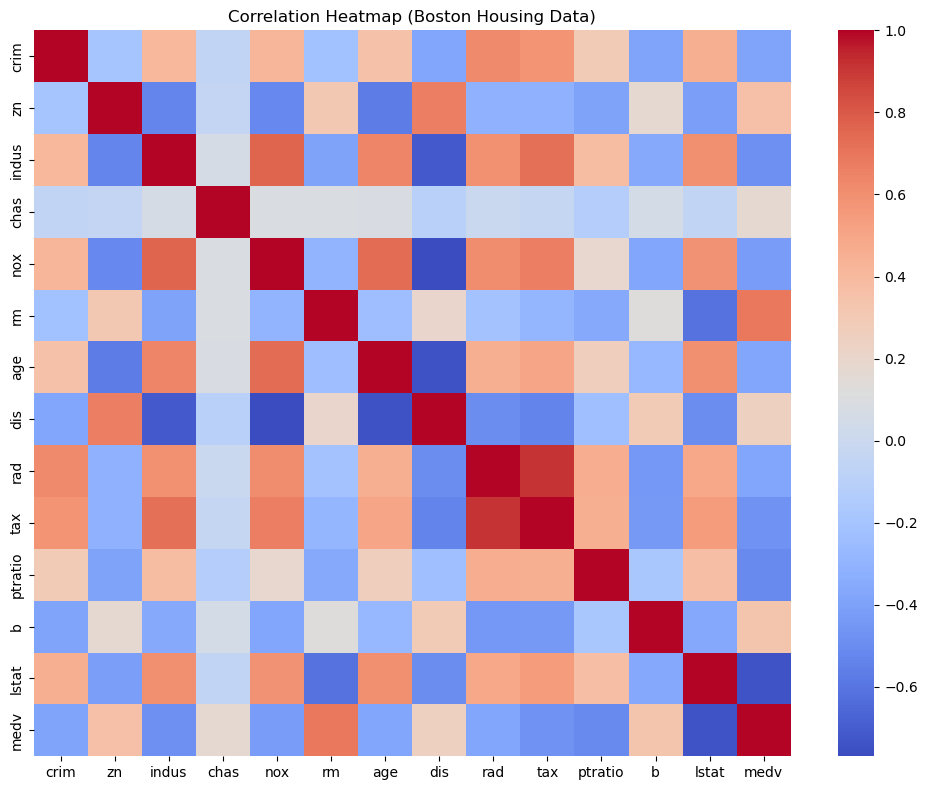

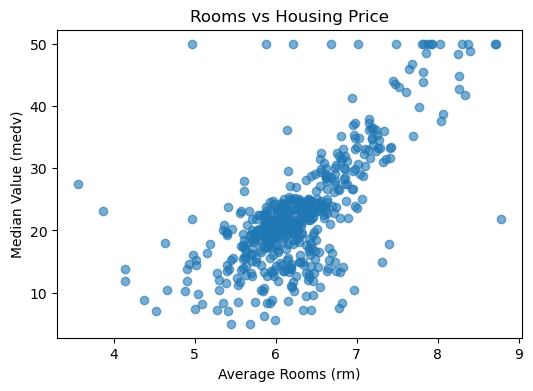

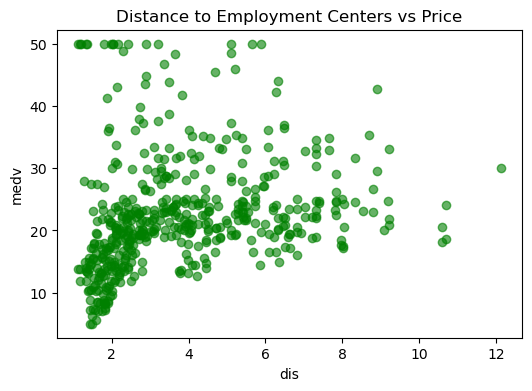

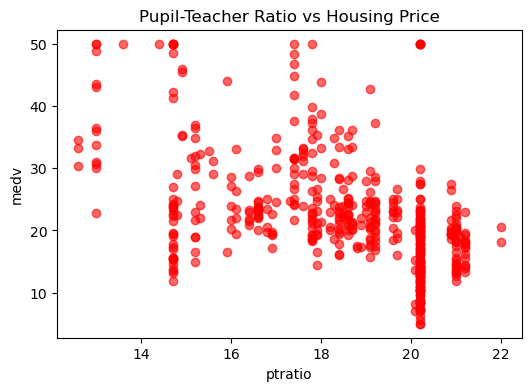

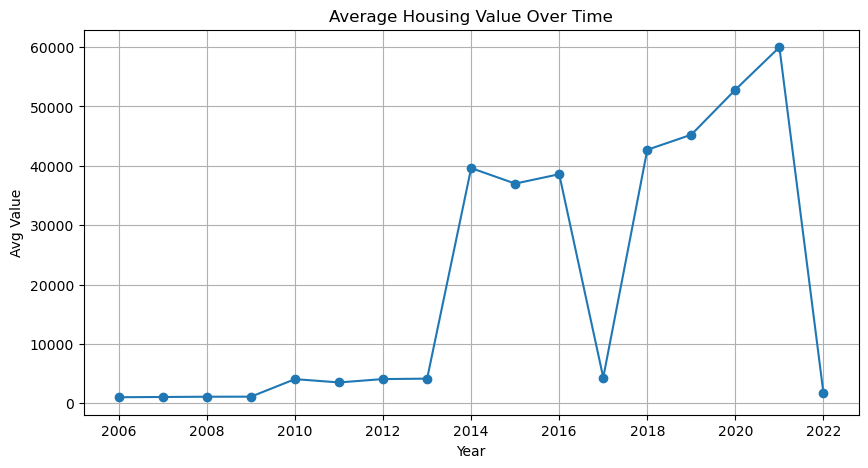

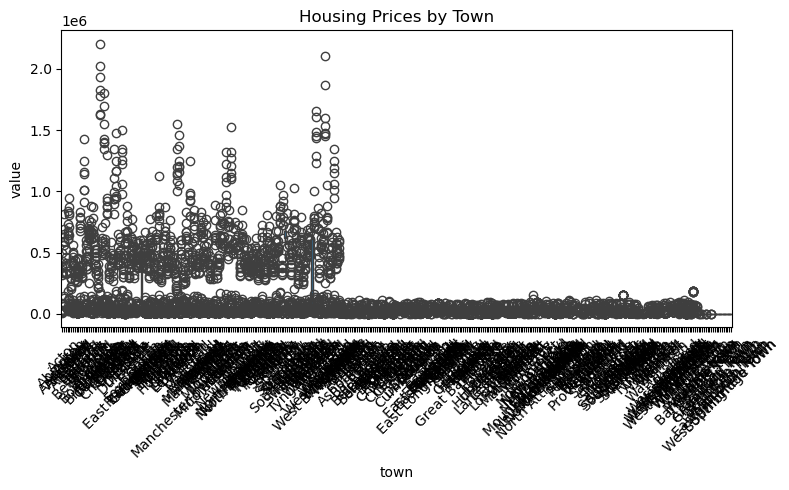

In [18]:
# -----------------------------
# EDA SECTION(descriptive statistics, visualizations)
# -----------------------------

# Correlation heatmap for data1
plt.figure(figsize=(10, 8))
sns.heatmap(data1.corr(), cmap="coolwarm")
plt.title("Correlation Heatmap (Boston Housing Data)")
plt.tight_layout()
plt.show()

# Scatter: number of rooms vs median value
plt.figure(figsize=(6,4))
plt.scatter(data1['rm'], data1['medv'], alpha=0.6)
plt.title("Rooms vs Housing Price")
plt.xlabel("Average Rooms (rm)")
plt.ylabel("Median Value (medv)")
plt.show()

# Scatter: distance to employment centers vs price
plt.figure(figsize=(6,4))
plt.scatter(data1['dis'], data1['medv'], alpha=0.6, color='green')
plt.title("Distance to Employment Centers vs Price")
plt.xlabel("dis")
plt.ylabel("medv")
plt.show()

# Pupil-teacher ratio vs medv
plt.figure(figsize=(6,4))
plt.scatter(data1['ptratio'], data1['medv'], alpha=0.6, color='red')
plt.title("Pupil-Teacher Ratio vs Housing Price")
plt.xlabel("ptratio")
plt.ylabel("medv")
plt.show()


# Trend over years from data3
year_avg = data3.groupby("year")['value'].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(year_avg['year'], year_avg['value'], marker='o')
plt.title("Average Housing Value Over Time")
plt.xlabel("Year")
plt.ylabel("Avg Value")
plt.grid(True)
plt.show()


# Boxplot: price differences by town
plt.figure(figsize=(8,5))
sns.boxplot(data=data3, x="town", y="value")
plt.title("Housing Prices by Town")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




In [19]:
# -----------------------------
# Simple Linear Regression(predicting housing prices)
# -----------------------------

from sklearn.linear_model import LinearRegression

# picking a few columns
X = data1[['rm', 'lstat', 'ptratio']]
y = data1['medv']

model = LinearRegression()
model.fit(X, y)

r2 = model.score(X, y)

print("\nSimple Linear Regression Results")
print("R2 Score:", round(r2, 4))
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)


Simple Linear Regression Results
R2 Score: 0.6783
Coefficients: [ 4.51320306 -0.57185429 -0.93048846]
Intercept: 18.578667419221986
